# Cluster Analysis

Import some basic modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Learning Objectives
1. Understand the concept of data standardisation and recognise different approaches.
2. Understand the purpose of cluster analysis and know the algorithms for k-means and hierarchical clustering.
3. Understand how SSE and silhouette scores can be used to assess the quality of a clustering.

## Basic Concept
<img src="Slide3.png" style="height:400px">

<img src="Slide4.png" style="height:400px">

## Data
<img src="Slide6.png" style="height:400px">

In [2]:
df = pd.read_csv('tremor_data.csv')
df.head()

,Time (mins),Distance (m),Size (Moment Magnitude)
0,14963,20518,3.0
1,15229,35321,1.8
2,17442,38120,1.9
3,17902,51661,2.0
4,18393,36197,1.7


In [3]:
summary_stats = df.describe()
np.round(summary_stats,decimals=1)

,Time (mins),Distance (m),Size (Moment Magnitude)
count,500.0,500.0,500.0
mean,30789.3,34287.1,2.2
std,5607.8,14433.0,0.3
min,14963.0,873.0,1.2
25%,24949.2,23034.0,1.9
50%,33131.0,32498.0,2.2
75%,34561.5,48837.5,2.4
max,44697.0,73074.0,3.2


<img src="Tukey_Slide.png" style="height:400px">

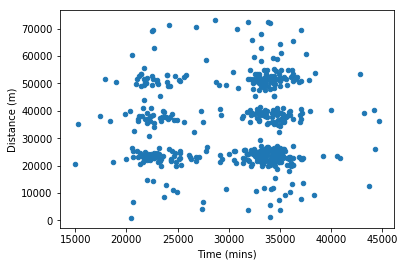

In [4]:
df.plot.scatter(x='Time (mins)',y='Distance (m)')
plt.show()

## Data Standardisation
### Why standardise data?
<img src="Slide8.png" style="height:400px">

<img src="Slide9.png" style="height:400px">

<img src="Slide10.png" style="height:400px">

<img src="Slide11.png" style="height:400px">

- Data in different units cannot be meaningfully compared without scaling.
- How you scale your data can be very important.
- Without standardisation, clustering may be dominated by the variable with the greatest range.

### Methods of Standardisation
<img src="Slide13.png" style="height:400px">

<img src="Slide14.png" style="height:400px">

<img src="Slide15.png" style="height:400px">
For a practical application of min-max rescaling and IDR standardisation, see:
https://www.ons.gov.uk/methodology/geography/geographicalproducts/areaclassifications/2011areaclassifications/methodologyandvariables )

<img src="Slide16.png" style="height:400px">

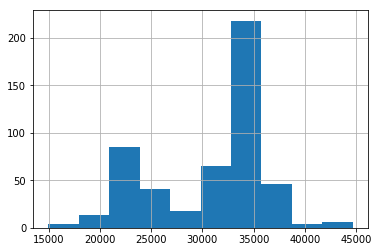

In [5]:
df['Time (mins)'].hist()
plt.show()

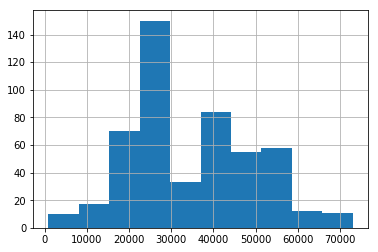

In [6]:
df['Distance (m)'].hist()
plt.show()

We will choose z-score standardisation. Create new columns containing standardised versions of each of the variables and add these to the dataframe.

Save this dataframe as 'new_tremor_data.csv'.

In [7]:
# Get means and standard deviations from the .describe() dataframe

stdevs = summary_stats.loc['std']
means = summary_stats.loc['mean']

# Create and add a standardised column for each column to the original dataframe :

for col in df.columns:
    df[col + '_standard'] = (df[col] - means[col])/ stdevs[col]

# Save:

df.to_csv('new_tremor_data.csv')

In [8]:
df.head()

,Time (mins),Distance (m),Size (Moment Magnitude),Time (mins)_standard,Distance (m)_standard,Size (Moment Magnitude)_standard
0,14963,20518,3.0,-2.822219,-0.954001,2.468986
1,15229,35321,1.8,-2.774784,0.071637,-1.091196
2,17442,38120,1.9,-2.380153,0.265568,-0.794514
3,17902,51661,2.0,-2.298124,1.203767,-0.497832
4,18393,36197,1.7,-2.210567,0.132331,-1.387878


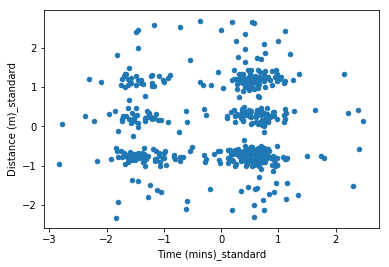

In [9]:
df.plot.scatter(x='Time (mins)_standard',y='Distance (m)_standard')
plt.show()

## Clustering Algorithms
### K-Means Clustering
<img src="Slide17.png" style="height:400px">

<img src="Slide18.png" style="height:400px">

<img src="Slide19.png" style="height:400px">

<img src="Slide20.png" style="height:400px">

<img src="Slide21.png" style="height:400px">

<img src="Slide22.png" style="height:400px">

<img src="Slide23.png" style="height:400px">

Let's apply k-means to the tremors data, using all three dimensions: time, distance and magnitude:

In [10]:
# Import the following packages:

import numpy as np
import sklearn.cluster as sklc

# Take the relevant standardised data from the dataframe we created earlier:

clustering_data = df.loc[:,['Time (mins)_standard','Distance (m)_standard','Size (Moment Magnitude)_standard']]

# Choose number of clusters, e.g.:

k = 6

# Perform k-means 20 times, returning the best results as an output object:

kmeans_output = sklc.KMeans(n_clusters=k, n_init=20).fit(clustering_data)

# Ask the output object for the information you need:

q6_cluster_ids = kmeans_output.labels_
q6_cluster_cns = kmeans_output.cluster_centers_

# Add the cluster ids to the dataframe:

df['cluster_ids_kmeans'] = q6_cluster_ids

# Inspect the results:
print("Cluster Centroids:")
print(np.round(q6_cluster_cns,decimals=1))

df.head()

Cluster Centroids:
[[ 0.5 -0.7  0.4]
 [ 0.7  0.7 -0.5]
 [-1.4 -0.7  0.6]
 [ 0.6  1.1  1.1]
 [ 0.6 -0.9 -1.1]
 [-1.4  1.  -0.8]]


,Time (mins),Distance (m),Size (Moment Magnitude),Time (mins)_standard,Distance (m)_standard,Size (Moment Magnitude)_standard,cluster_ids_kmeans
0,14963,20518,3.0,-2.822219,-0.954001,2.468986,2
1,15229,35321,1.8,-2.774784,0.071637,-1.091196,5
2,17442,38120,1.9,-2.380153,0.265568,-0.794514,5
3,17902,51661,2.0,-2.298124,1.203767,-0.497832,5
4,18393,36197,1.7,-2.210567,0.132331,-1.387878,5


To understand these clusters, we need to visualise them:

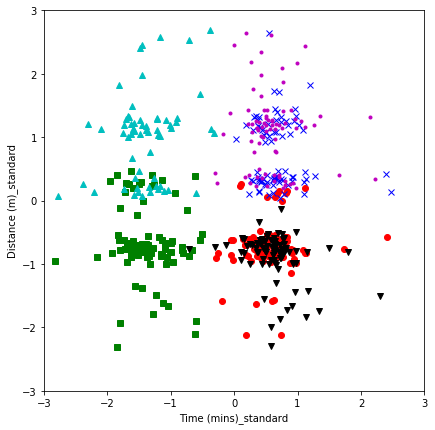

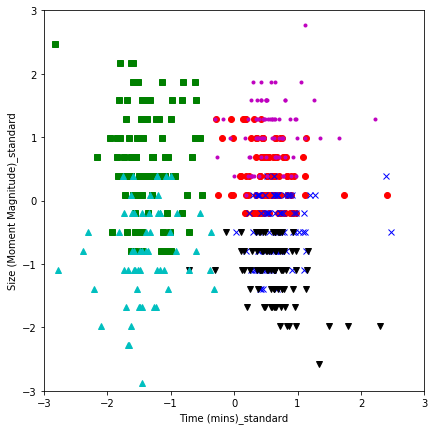

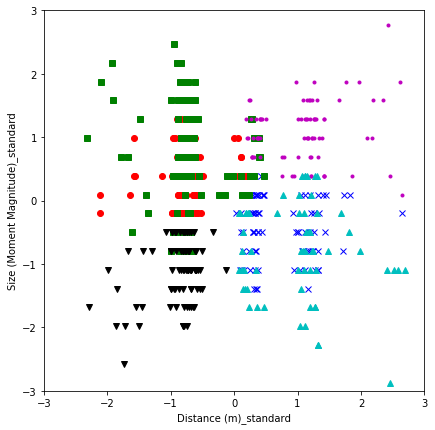

In [11]:
# Let's visualise these clusters in 2D plots, taking two variables at a time.
# The plots show three views of the 3-dimensional data cloud.

colours = ['r','b','g','m','k','c','y'] * 12
icons   = ['o','x','s','.','v','^','<','>','*','+','D','d'] * 7


def plot_clusters_for_two_variables(data,data_clusters,var1,var2,fignum):

    plt.figure(fignum,figsize = (7,7))

    for i in range(k):
        
        plt.figure(fignum)
        data_this_cluster = data[data_clusters==i]
        
        plt.plot(data_this_cluster[var1],data_this_cluster[var2],colours[i] + icons[i])

        plt.gca().set_aspect('equal')
        plt.gca().set_xlim([-3,3])
        plt.gca().set_ylim([-3,3])
        
        plt.gca().set_xlabel(var1)
        plt.gca().set_ylabel(var2)

    plt.savefig('clusters_' + str(fignum) +'.png')

    plt.show()
    
cluster_ids = df['cluster_ids_kmeans']

plot_clusters_for_two_variables(clustering_data,cluster_ids,'Time (mins)_standard','Distance (m)_standard',10)
plot_clusters_for_two_variables(clustering_data,cluster_ids,'Time (mins)_standard','Size (Moment Magnitude)_standard',11)
plot_clusters_for_two_variables(clustering_data,cluster_ids,'Distance (m)_standard','Size (Moment Magnitude)_standard',12)

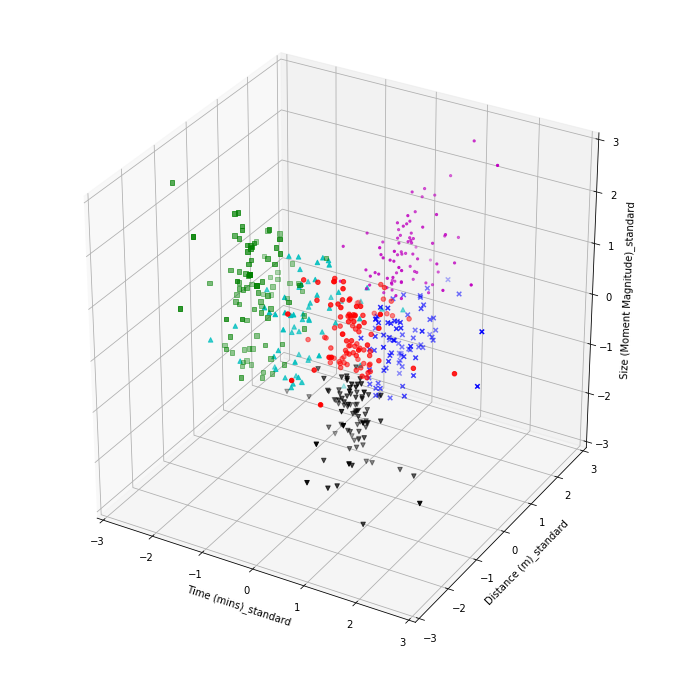

In [12]:
# Some 3D Plotting would be pretty handy here:

from mpl_toolkits.mplot3d import Axes3D

def plot_3D_clusters(data,data_clusters,var1,var2,var3,fignum):

    fig = plt.figure(fignum,figsize = (12,12))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(k):
        
        plt.figure(fignum)
        data_this_cluster = data[data_clusters==i]
        
        ax.scatter(data_this_cluster[var1],data_this_cluster[var2],data_this_cluster[var3],c=colours[i],marker=icons[i])

        ax.set_aspect('equal')
        ax.set_xlim([-3,3])
        ax.set_ylim([-3,3])
        ax.set_zlim([-3,3])
        
        plt.gca().set_xlabel(var1)
        plt.gca().set_ylabel(var2)
        plt.gca().set_zlabel(var3)

    plt.savefig('3Dclusters_' + str(fignum) +'.png')

    plt.show()

cluster_ids = df['cluster_ids_kmeans']
plot_3D_clusters(clustering_data,cluster_ids,'Time (mins)_standard','Distance (m)_standard','Size (Moment Magnitude)_standard',12121)


### Hierarchical Agglomerative Clustering
<img src="Slide24.png" style="height:400px">

<img src="Slide25.png" style="height:400px">

<img src="Slide26.png" style="height:400px">

<img src="Slide27.png" style="height:400px">

<img src="Slide28.png" style="height:400px">

<img src="Slide29.png" style="height:400px">

<img src="Slide30.png" style="height:400px">

<img src="Slide31.png" style="height:400px">

In [13]:
# Import the following packages:

import scipy.cluster.hierarchy as spch

In [14]:
num_clusters = 6
cluster_allocations_hmaxclust = spch.fclusterdata(clustering_data, num_clusters, metric='euclidean', method='single',criterion='maxclust')

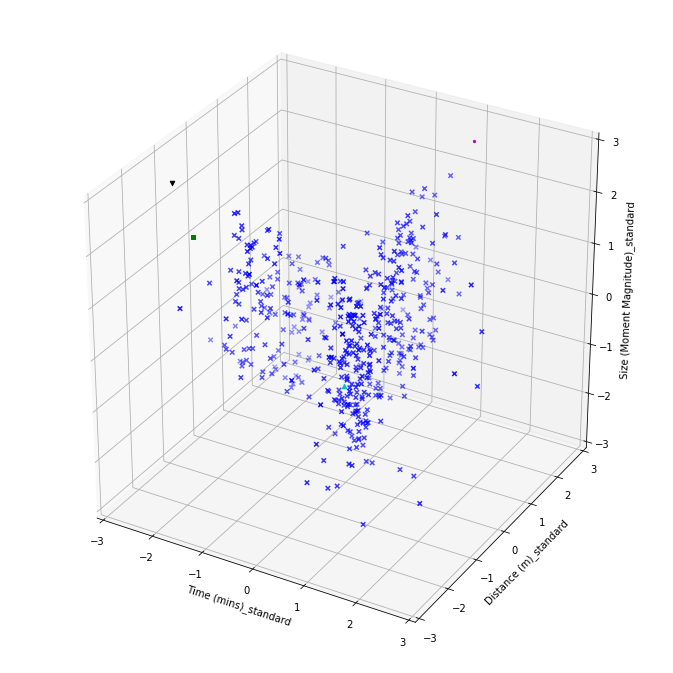

In [15]:
# A quick 3D visualisation of these clusters:
cluster_ids = cluster_allocations_hmaxclust
plot_3D_clusters(clustering_data,cluster_ids,'Time (mins)_standard','Distance (m)_standard','Size (Moment Magnitude)_standard',12121)

<img src="Slide32.png" style="height:400px">

<img src="Slide33.png" style="height:400px">

<img src="Slide34.png" style="height:400px">

<img src="Slide35.png" style="height:400px">

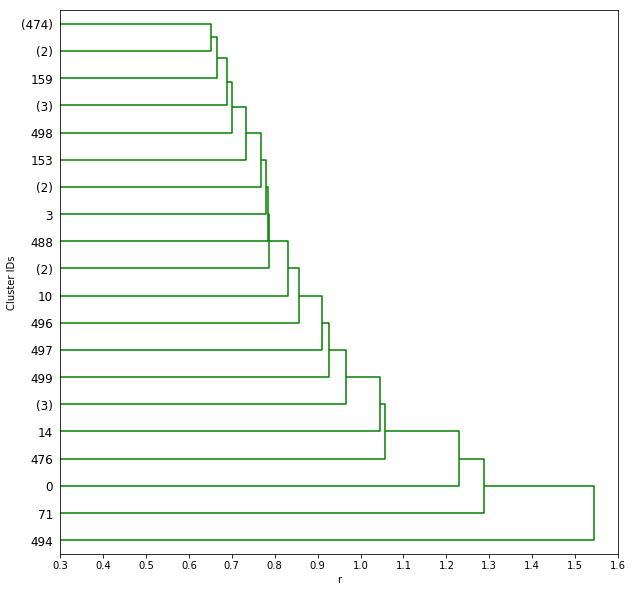

In [16]:
# Plotting a Dendrogram:

Z = spch.linkage(clustering_data, method='single', metric='euclidean')
plt.figure(30,figsize = (10,10))
spch.dendrogram(Z,p=20,truncate_mode='lastp',color_threshold=2,orientation='right')
plt.gca().set_xlim([0.3,1.3])
plt.gca().set_xticks(np.linspace(0.3,1.6,14))
plt.gca().set_xlabel('r')
plt.gca().set_ylabel('Cluster IDs')

plt.savefig('tremor_hagglom_dendrogram.png')

plt.show()

## Measuring Clustering Quality
<img src="Slide36.png" style="height:400px">

<img src="Slide37.png" style="height:400px">

<img src="Slide38.png" style="height:400px">

### Method 1 - SSE
<img src="Slide40.png" style="height:400px">

In [17]:
print('SSE for previous (3 variable) k-means clustering:', np.round(kmeans_output.inertia_,decimals=1))

SSE for previous (3 variable) k-means clustering: 394.6


<img src="Slide41.png" style="height:400px">

### Method 2 - Silhouette Analysis
<img src="Slide42.png" style="height:400px">

In [18]:
# Import the following package:

import sklearn.metrics as sklm

<img src="Slide43.png" style="height:400px">

<img src="Slide44.png" style="height:400px">

<img src="Slide45.png" style="height:400px">

<img src="Slide46.png" style="height:400px">

<img src="Slide47.png" style="height:400px">

<img src="Slide48.png" style="height:400px">

<img src="Slide49.png" style="height:400px">

<img src="Slide50.png" style="height:400px">

Shown above is a silhouette diagram for the two-dimensional data.

Let's produce a silhouette diagram for the full three-dimensional tremors data:

In [19]:
# Set range of k values:

k_range = range(1,21)

# Create (almost) empty lists to store the output:
# (Cluster Allocations, SSE, Centroids, Silhouette scores)

# (Almost) empty, because we start with one piece of missing data in position zero.
# This is the data for zero clusters (i.e. an impossible case), and it means that the...
# ... indices of the elements will match the number of clusters that they refer to:

cluster_ids_series = [np.nan]
cluster_sse_series = [np.nan]
cluster_cns_series = [np.nan]
cluster_shs_series = [np.nan]

# Loop through k values:

for k in k_range:
    
    # Perform k means as before:
    
    km_output = sklc.KMeans(n_clusters = k, n_init = 20).fit(clustering_data)

    # Add the results to our lists:
    
    cluster_ids_series.append(km_output.labels_)
    cluster_sse_series.append(km_output.inertia_)
    cluster_cns_series.append(km_output.cluster_centers_)
    
    # Only add silhouettes if there is no error, since silhouettes cannot be calculated when, e.g...
    # ... there is only one cluster or where some points are in their own clusters:
    
    try:
        cluster_shs_series.append(sklm.silhouette_score(clustering_data,km_output.labels_))
    except:
        cluster_shs_series.append(0)

# Build a dictionary of the quantities we need to report on and convert to a dataframe.
# Also drop rows with missing data:
report_dict = {'SSE':cluster_sse_series,'Silhouette Score':cluster_shs_series}
report_df   = pd.DataFrame(report_dict,index=range(21))
report_df   = report_df.dropna(how='any')

# Find and report the optimal value of k:

optimal_k_by_silhouette_score = report_df['Silhouette Score'].idxmax()
optimal_silhouette_score      = report_df.loc[optimal_k_by_silhouette_score,'Silhouette Score']

print('The optimal number of clusters, as determined by silhouette analysis, is ' + str(optimal_k_by_silhouette_score) + ".")
print('The silhouette score for ' + str(optimal_k_by_silhouette_score) + " clusters is " + str(optimal_silhouette_score) + ".")

report_df

The optimal number of clusters, as determined by silhouette analysis, is 4.
The silhouette score for 4 clusters is 0.38042406738305873.


,SSE,Silhouette Score
1,1497.000000,0.000000
2,1074.916372,0.335446
3,752.233210,0.349713
4,570.803247,0.380424
5,473.890034,0.338219
6,394.553833,0.358308
7,343.574863,0.355323
8,312.338837,0.342047
9,284.230615,0.348784
10,266.057546,0.328744


In [20]:
# We will add the optimal cluster ids to the main dataframe:

optimal_cluster_ids = cluster_ids_series[optimal_k_by_silhouette_score]
df['optimal_kmeans_cluster_ids'] = optimal_cluster_ids

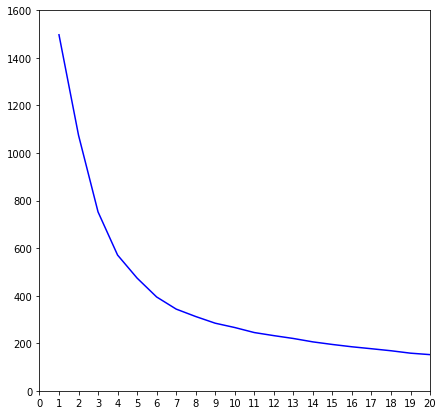

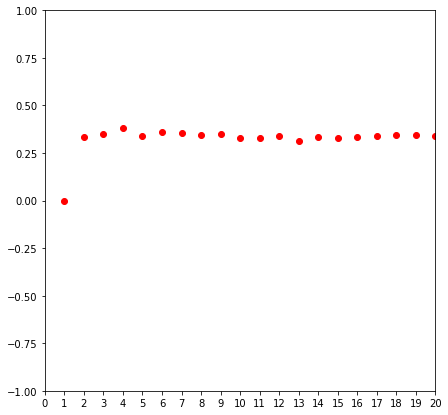

In [21]:
# Again, for the sake of interest, let's create an elbow plot and a silhouette plot:

fignum = 20
plt.figure(fignum,figsize = (7,7))
plt.plot(report_df.index,report_df['SSE'],'b-')

#plt.gca().set_aspect('equal')
plt.gca().set_xlim([0,20])
plt.gca().set_xticks(range(21))
plt.gca().set_ylim([0,1600])

plt.savefig('elbow_plot' + str(fignum) +'.png')
plt.show()

fignum = 21
plt.figure(fignum,figsize = (7,7))
plt.plot(report_df.index,report_df['Silhouette Score'],'ro')

plt.gca().set_xlim([0,20])
plt.gca().set_xticks(range(21))
plt.gca().set_ylim([-1,1])

plt.savefig('silhouette_plot' + str(fignum) +'.png')
plt.show()

<img src="Slide51.png" style="height:400px">

<img src="Slide52.png" style="height:400px">

<img src="Slide53.png" style="height:400px">

<img src="Slide54.png" style="height:400px">

Using the optimal k-means clustering, print summary statistics for each of the clusters (i.e. the mean, standard deviation, min and max of each variable).

In [22]:
# e.g. for kmeans:

# Create an empty list for the separate dataframes:

separate_cluster_dataframes = []

# Create a list of the cluster id numbers:

clusters = range(df['optimal_kmeans_cluster_ids'].max() + 1)

# For each cluster, take a reduced version of the main dataframe, filtered to contain only that cluster. 

for i in clusters:
    separate_cluster_dataframes.append(df[df['optimal_kmeans_cluster_ids'] == i])

# Create summary stats dataframes for each cluster:
    
separate_cluster_summary_stats = []

for i in clusters:
    separate_cluster_summary_stats.append(separate_cluster_dataframes[i].describe())

In [23]:
# e.g. for Cluster 0:

separate_cluster_summary_stats[0]

,Time (mins),Distance (m),Size (Moment Magnitude),Time (mins)_standard,Distance (m)_standard,Size (Moment Magnitude)_standard,cluster_ids_kmeans,optimal_kmeans_cluster_ids
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,23137.634921,48796.952381,1.893651,-1.364483,1.005329,-0.813351,4.936508,0.0
std,2844.749228,9677.906296,0.250723,0.507288,0.670542,0.743851,0.503953,0.0
min,15229.000000,35321.000000,1.200000,-2.774784,0.071637,-2.871287,1.000000,0.0
25%,21740.000000,38741.000000,1.750000,-1.613715,0.308594,-1.239537,5.000000,0.0
50%,22667.000000,50402.000000,1.900000,-1.448409,1.116536,-0.794514,5.000000,0.0
75%,24219.000000,52645.000000,2.100000,-1.171650,1.271945,-0.201150,5.000000,0.0
max,33088.000000,73074.000000,2.300000,0.409908,2.687385,0.392213,5.000000,0.0


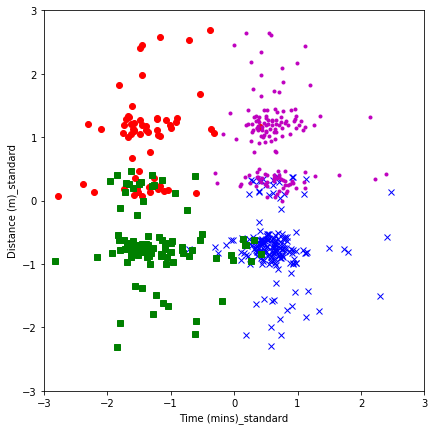

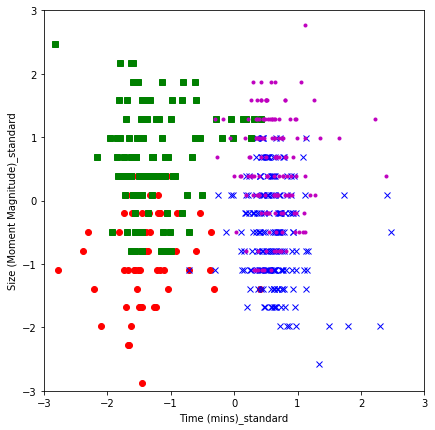

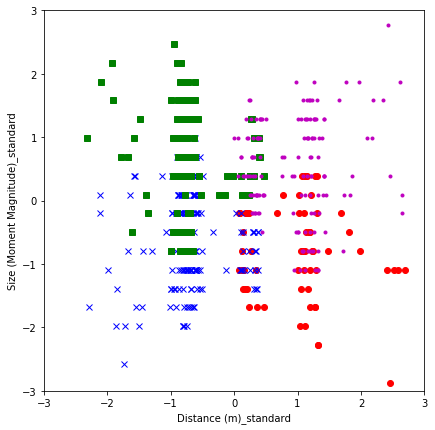

In [24]:
plot_clusters_for_two_variables(clustering_data,df['optimal_kmeans_cluster_ids'],'Time (mins)_standard','Distance (m)_standard',100)
plot_clusters_for_two_variables(clustering_data,df['optimal_kmeans_cluster_ids'],'Time (mins)_standard','Size (Moment Magnitude)_standard',101)
plot_clusters_for_two_variables(clustering_data,df['optimal_kmeans_cluster_ids'],'Distance (m)_standard','Size (Moment Magnitude)_standard',102)

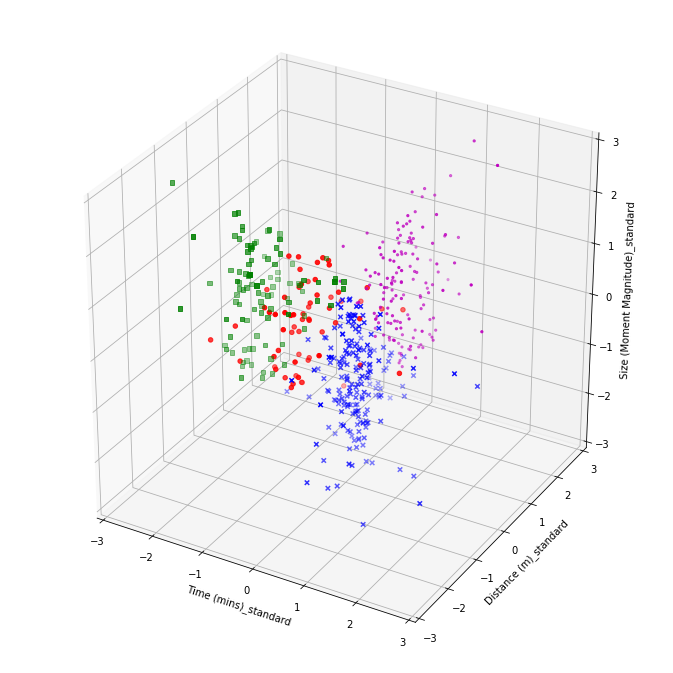

In [25]:
# A quick 3D visualisation of these clusters:
plot_3D_clusters(clustering_data,df['optimal_kmeans_cluster_ids'],'Time (mins)_standard','Distance (m)_standard','Size (Moment Magnitude)_standard',12121)